<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/my_code_GAN_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs for FashionMNIST

In [3]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from PIL import Image
from torch.utils.data import DataLoader

import sys

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [4]:
device = 'cpu'
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

'cpu'

# Import the data

In [5]:
FashionMNIST = torchvision.datasets.FashionMNIST(root='sample_data',download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



In [6]:
FashionMNIST

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: sample_data
    Split: Train

In [7]:
FashionMNIST.data.shape

torch.Size([60000, 28, 28])

In [8]:
FashionMNIST.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

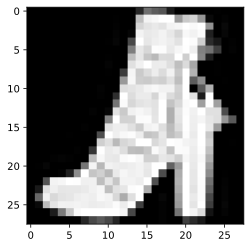

In [9]:
plt.imshow(FashionMNIST.data[11,:,:],cmap='gray')

In [10]:
FashionMNIST[11]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA55096BC90>, 9)

In [11]:
FashionMNIST[11][0]

In [12]:
FashionMNIST[11][1]

9

In [13]:
FashionMNIST.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [26]:
FashionMNIST.data[FashionMNIST.targets == 1].shape

torch.Size([6000, 28, 28])

In [14]:
data = FashionMNIST.data
labels = FashionMNIST.targets

In [29]:
data[(labels==1) | (labels==7) | (labels==2)].shape

torch.Size([18000, 28, 28])

In [30]:
labels[(labels==1) | (labels==7) | (labels==2)]

tensor([2, 7, 2,  ..., 7, 2, 1])

In [31]:
data = data[(labels==1) | (labels==7) | (labels==2)]
labels = labels[(labels==1) | (labels==7) | (labels==2)]

In [32]:
dataNorm = data / data.max()
dataNorm = 2 * dataNorm - 1

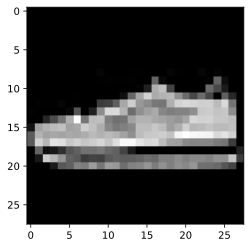

In [33]:
plt.imshow(dataNorm[11,:,:],cmap='gray')

In [34]:
dataT = torch.FloatTensor(dataNorm)

In [35]:
dataT.shape

torch.Size([18000, 28, 28])

In [36]:
batchsize = 128
train_loader = DataLoader(dataT,batch_size=batchsize,shuffle=True,drop_last=True)

# Create classes for the discriminator and generator

In [37]:
class discriminatorNet(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(28*28,256)
    self.fc2 = nn.Linear(256,256)
    self.out = nn.Linear(256,1)

  def forward(self,x):
    x = F.leaky_relu( self.fc1(x) )
    x = F.leaky_relu( self.fc2(x) )
    x = self.out(x)
    return torch.sigmoid( x )

dnet = discriminatorNet()
y = dnet(torch.randn(10,784))
y

tensor([[0.4698],
        [0.5015],
        [0.5240],
        [0.5003],
        [0.4636],
        [0.5003],
        [0.5013],
        [0.5142],
        [0.5119],
        [0.5010]], grad_fn=<SigmoidBackward0>)

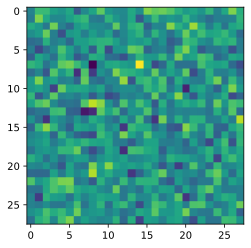

In [38]:
class generatorNet(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(64,256)
    self.fc2 = nn.Linear(256,256)
    self.out = nn.Linear(256,784)

  def forward(self,x):
    x = F.leaky_relu( self.fc1(x) )
    x = F.leaky_relu( self.fc2(x) )
    x = self.out(x)
    return torch.tanh( x )


gnet = generatorNet()
y = gnet(torch.randn(10,64))

plt.imshow(y[0,:].detach().squeeze().view(28,28));